<a href="https://colab.research.google.com/github/crisdavid3335/analytics_with_KERAS/blob/main/Tabular_Playground_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo de la competición
Con las miles de secuencias de sesenta segundos de datos de los sensores registrados, determine en cuál de los dos estados posibles se encuentran los voluntarios.

Importación de las librerías necesarias

In [ ]:
# Importamos las librerías
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

Carga de datos

In [ ]:
# Cargamos los datos

# Datos de entrenamiento
train= pd.read_csv('/content/drive/MyDrive/Proyectos/Tabular Playground Series kaggle/train.csv')

# Datos para predicción
test = pd.read_csv('/content/drive/MyDrive/Proyectos/Tabular Playground Series kaggle/test.csv')

# Equetas (objetivos)
target = pd.read_csv('/content/drive/MyDrive/Proyectos/Tabular Playground Series kaggle/train_labels.csv')

In [ ]:
# Revisemos los datos de entrenamiento
train.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359


<strog>Información de datos</strog>

En esta competición, clasificará secuencias de 60 segundos de datos de sensores, indicando si un sujeto estaba en uno de los dos estados de actividad durante la duración de la secuencia.

<p>Archivos y descripciones de campos</p>
<p>train.csv - el conjunto de entrenamiento, que comprende ~26.000 grabaciones de 60 segundos de trece sensores biológicos de casi mil participantes experimentales</p>
<li>secuencia: un identificador único para cada secuencia</li>
<li>subject - un identificador único para el sujeto del experimento</li>
<li>paso - paso de tiempo de la grabación, en intervalos de un segundo</li>
<li>sensor_00 - sensor_12 - el valor de cada uno de los trece sensores en ese paso de tiempo</li>
<p>train_labels.csv - la etiqueta de clase para cada secuencia.</p>
<li>sequence - el identificador único de cada secuencia.</li>
<li>state - el estado asociado a cada secuencia. <strong>Este es el objetivo que se intenta predecir.</strong></li>
<p>test.csv - el conjunto de pruebas. Para cada una de las ~12.000 secuencias, debe predecir un valor para el estado de esa secuencia.</p>
<p>sample_submission.csv - un archivo de presentación de muestra en el formato correcto.</p>

In [ ]:
# Generamos la estadistica descriptiva de los datos de entrenamiento
train.describe()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
count,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06
mean,1.298350e+04,3.316331e+02,2.950000e+01,4.365526e-04,-1.034982e-03,-2.178045e-01,-2.156555e-03,-1.828903e-03,-1.651785e-03,-4.122917e-04,-2.620665e-05,-1.298393e-04,1.365584e-03,3.315801e-04,-3.733291e-03,-1.172605e-02
std,7.496318e+03,1.958257e+02,1.731811e+01,2.658684e+00,4.404200e+00,2.298002e+00,3.934184e+00,1.683685e+00,1.590818e+00,3.345143e+00,3.243428e+00,4.501534e+00,2.592913e+00,1.917333e+00,4.532568e+00,3.911767e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.750634e+02,-4.345977e+02,-3.165948e+01,-4.083761e+02,-2.362601e+01,-7.498280e+01,-4.705046e+02,-4.070115e+02,-5.361000e+02,-2.703468e+02,-4.341271e+01,-4.270586e+02,-6.125494e+02
25%,6.491750e+03,1.617500e+02,1.475000e+01,-5.000000e-01,-4.831933e-01,-6.461531e-01,-4.929204e-01,-4.729928e-01,-4.786836e-01,-4.927140e-01,-5.022901e-01,-5.000000e-01,-5.151734e-01,-4.787939e-01,-4.835391e-01,-5.805627e-01
50%,1.298350e+04,3.350000e+02,2.950000e+01,-3.091190e-03,3.151261e-03,0.000000e+00,0.000000e+00,-1.589577e-03,2.991773e-03,9.107468e-04,-2.290076e-03,0.000000e+00,-1.445087e-03,-1.655822e-03,3.086420e-03,0.000000e+00
75%,1.947525e+04,5.010000e+02,4.425000e+01,4.845440e-01,4.926471e-01,3.338469e-01,4.893805e-01,4.701565e-01,5.056096e-01,4.927140e-01,4.847328e-01,5.000000e-01,5.086705e-01,4.780386e-01,4.938272e-01,5.703325e-01
max,2.596700e+04,6.710000e+02,5.900000e+01,3.358246e+02,4.495914e+02,1.666667e+00,4.366504e+02,2.487286e+01,7.791548e+01,4.425009e+02,3.312542e+02,6.301000e+02,3.679812e+02,4.186559e+01,4.480206e+02,6.305111e+02


In [ ]:
# Datos nulos
train.isnull().sum()

sequence     0
subject      0
step         0
sensor_00    0
sensor_01    0
sensor_02    0
sensor_03    0
sensor_04    0
sensor_05    0
sensor_06    0
sensor_07    0
sensor_08    0
sensor_09    0
sensor_10    0
sensor_11    0
sensor_12    0
dtype: int64

In [ ]:
# Los objetivos 
target.head()

,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


Existen identificadores en los conjuntos de objetivos y en los datos de entrenamiento, vamos a unirlos por su identificador

In [ ]:
train = train.merge(target, how='left', on=['sequence'])
# Revisemos la tabla resultado
train.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,0
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,0
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,0
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,0
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,0


Como un participante tiene varios registros, es posible analizar sus estadísticas (media, valor maximo, minimo, varianza, etc).

In [ ]:
def aggregated_features(df, aggregation_cols = ['sequence'], prefix = ''):
    agg_strategy = {'sensor_00': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_01': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_02': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_03': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_04': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_05': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_06': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_07': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_08': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_09': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_10': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_11': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_12': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                   }
    group = df.groupby(aggregation_cols).aggregate(agg_strategy)
    group.columns = ['_'.join(col).strip() for col in group.columns]
    group.columns = [str(prefix) + str(col) for col in group.columns]
    group.reset_index(inplace = True)
    
    temp = (df.groupby(aggregation_cols).size().reset_index(name = str(prefix) + 'size'))
    group = pd.merge(temp, group, how = 'left', on = aggregation_cols)
    return group

Aquí agregamos los datos que hemos calculado a los datos de entrenamiento y de pruebas.

In [ ]:
train_m_data = aggregated_features(train, aggregation_cols = ['sequence', 'subject'])
test_m_data = aggregated_features(test, aggregation_cols = ['sequence', 'subject'])

Esto nos deja con la siguiente información:
<li> Las estadisticas de cada participante, por secuencia.

In [ ]:
# Datos agregados por secuencia y participante
train_m_data.head()

,sequence,subject,size,sensor_00_mean,sensor_00_max,sensor_00_min,sensor_00_var,sensor_00_mad,sensor_00_sum,sensor_00_median,...,sensor_11_mad,sensor_11_sum,sensor_11_median,sensor_12_mean,sensor_12_max,sensor_12_min,sensor_12_var,sensor_12_mad,sensor_12_sum,sensor_12_median
0,0,47,60,0.041744,7.534003,-5.634467,2.049649,0.829612,2.504637,-0.148764,...,0.967853,0.623457,0.193416,-1.286985,6.674766,-50.658994,67.352879,4.388229,-77.219096,-0.447997
1,1,66,60,-0.069294,5.870943,-6.657651,2.540538,0.964271,-4.157651,-0.031298,...,1.089381,11.994856,0.053498,-1.604085,144.598039,-160.234442,2529.213697,26.509574,-96.245098,-0.009591
2,2,66,60,-0.001546,3.402628,-2.797527,1.316816,0.855307,-0.092736,0.058733,...,0.482209,-0.175926,0.083848,0.000945,1.116795,-1.044331,0.130360,0.249470,0.056692,-0.004902
3,3,542,60,0.029869,4.856260,-3.643740,3.131857,1.379164,1.792117,-0.119784,...,1.013548,-1.600823,-0.175926,-0.003708,0.593350,-0.837170,0.058423,0.170745,-0.222506,-0.012361
4,4,437,60,0.059132,5.455951,-5.331530,4.059335,1.495183,3.547913,0.005410,...,2.106692,-5.979424,-0.115741,0.000028,0.135976,-0.098465,0.002663,0.040891,0.001705,0.002344


Sin embargo, una mejor interpretación de los datos es tomar en cuenta únicamente a los participantes (con todas sus secuencias) esto debido a que los estados físicos deben ser constantes en cada participante.

In [ ]:
train_subjects_m_data = aggregated_features(train, aggregation_cols = ['subject'], prefix = 'subject_')
test_subjects_m_data = aggregated_features(test, aggregation_cols = ['subject'], prefix = 'subject_')

In [ ]:
# Datos agregados por participante
train_subjects_m_data.head()

,subject,subject_size,subject_sensor_00_mean,subject_sensor_00_max,subject_sensor_00_min,subject_sensor_00_var,subject_sensor_00_mad,subject_sensor_00_sum,subject_sensor_00_median,subject_sensor_01_mean,...,subject_sensor_11_mad,subject_sensor_11_sum,subject_sensor_11_median,subject_sensor_12_mean,subject_sensor_12_max,subject_sensor_12_min,subject_sensor_12_var,subject_sensor_12_mad,subject_sensor_12_sum,subject_sensor_12_median
0,0,1200,0.001058,3.936631,-4.695518,0.579405,0.524290,1.269706,0.003864,-0.000478,...,0.445067,-3.368313,-0.011831,-0.007687,1.536232,-7.801790,0.371089,0.459001,-9.224211,0.007886
1,1,10500,-0.002550,35.463679,-34.591963,1.546208,0.745773,-26.778980,0.002318,-0.014114,...,0.731817,42.049383,-0.014403,-0.107664,328.472293,-293.231458,4107.284790,50.113950,-1130.476130,0.505754
2,2,2280,0.010308,6.453632,-6.898764,1.465470,0.813444,23.503091,-0.023570,-0.008271,...,0.539252,-19.794239,0.001543,-0.590029,416.050298,-425.902387,23282.308252,126.422564,-1345.265985,-3.700128
3,3,2160,-0.004428,5.753478,-8.153787,0.846161,0.601889,-9.564915,-0.002318,-0.000313,...,0.489554,-2.666667,0.017490,0.000702,1.424552,-1.623615,0.006993,0.044377,1.516624,0.000426
4,4,1560,0.008160,5.770479,-4.090417,0.565596,0.531483,12.729521,-0.008501,0.003920,...,0.614274,5.048354,0.036523,-0.002236,1.789003,-2.025149,0.131529,0.234263,-3.488917,-0.023018


Eso nos deja con únicamente 672 registros con 93 columnas cada uno. Estas columnas contienen la información estadística de los sensores para cada participante.

In [ ]:
train_subjects_m_data.shape

(672, 93)

Empezaremos a utilizar rezagos, se asume que el estado actual de la serie depende de los estados anteriores y, por tanto, el elemento t depende del elemento t - 1.

In [ ]:
# Se agregan tres resagos t-1, t-5 y t-10
train['sensor_00_lag_01'] = train['sensor_00'].shift(1)
train['sensor_00_lag_05'] = train['sensor_00'].shift(5)
train['sensor_00_lag_10'] = train['sensor_00'].shift(10)
train.head(15)

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state,sensor_00_lag_01,sensor_00_lag_05,sensor_00_lag_10
0,0,47,0,-0.196291,0.112395,1.000000,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,0,NaN,NaN,NaN
1,0,47,1,-0.447450,0.134454,1.000000,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,0,-0.196291,NaN,NaN
2,0,47,2,0.326893,-0.694328,1.000000,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,0,-0.447450,NaN,NaN
3,0,47,3,0.523184,0.751050,1.000000,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,0,0.326893,NaN,NaN
4,0,47,4,0.272025,1.074580,1.000000,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,0,0.523184,NaN,NaN
5,0,47,5,-1.073416,-1.714286,1.000000,-1.492920,0.469736,0.713538,-1.792350,-1.082443,-0.5,0.314306,0.664594,-1.682099,-2.838448,0,0.272025,-0.196291,NaN
6,0,47,6,0.350850,0.439076,1.000000,0.870796,-0.596964,0.923710,0.769581,0.666412,0.2,-0.723266,-1.691552,0.842593,1.849531,0,-1.073416,-0.447450,NaN
7,0,47,7,-0.304482,-0.379202,1.000000,-0.218584,-0.059983,-1.389678,-0.182149,-0.029771,0.1,-0.070809,-0.774024,-0.612140,3.300938,0,0.350850,0.326893,NaN
8,0,47,8,-0.216383,1.106092,1.000000,0.677876,-0.071718,-0.456993,0.296903,0.111450,0.6,-0.525289,-0.334069,1.751029,0.515772,0,-0.304482,0.523184,NaN
9,0,47,9,0.303709,-1.744748,1.000000,-0.896460,-0.755221,-0.254301,-0.354281,-0.591603,0.0,0.151012,-0.268359,-2.033951,4.509378,0,-0.216383,0.272025,NaN


Estamos listos con la información, es momento de unirlo todo en un solo conjunto

In [ ]:
# Agregamos las estadisticas por participante, secuencia y sensor
train_merge_data = train_m_data.merge(target, how='left', on = 'sequence')

# Agregamos las estadisticas por participante y sensor
train_merge_data = train_merge_data.merge(train_subjects_m_data, how = 'left', on = 'subject')

# Agregamos la información al conjunto de pruebas
test_merge_data = test_m_data.merge(test_subjects_m_data, how = 'left', on = 'subject')

In [ ]:
print('Las dimensiones del set de entrenamiento son:', train_merge_data.shape)
print('Las dimensiones del set de pruebas son:', test_merge_data.shape)

Las dimensiones del set de entrenamiento son: (25968, 187)
Las dimensiones del set de pruebas son: (12218, 186)


Para finalizar el procesamiento, hay que separar el conjunto de validación.

In [ ]:
ignore = ['sequence', 'state', 'subject']
X = [feat for feat in train_merge_data.columns if feat not in ignore]
y = 'state'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_merge_data[X], 
                                                  train_merge_data[y], 
                                                  test_size = 0.3,
                                                  random_state = 0)

Se empieza con la construcción del modelo

In [ ]:
import lightgbm as ltb

model = ltb.LGBMClassifier()
model.fit(X_train, y_train,
          eval_set =[(X_val, y_val)],
          eval_metric=['auc', 'logloss'],
          early_stopping_rounds = 64,
          verbose = 32)

Training until validation scores don't improve for 64 rounds.
[32]	valid_0's auc: 0.897432	valid_0's binary_logloss: 0.412705
[64]	valid_0's auc: 0.916777	valid_0's binary_logloss: 0.364206
[96]	valid_0's auc: 0.923507	valid_0's binary_logloss: 0.345439
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.924072	valid_0's binary_logloss: 0.343631


LGBMClassifier()

In [ ]:
from sklearn.metrics import roc_auc_score

y_hat = model.predict_proba(X_val)[:,1]
score = roc_auc_score(y_val, y_hat)
print(score)

0.9240715828112886


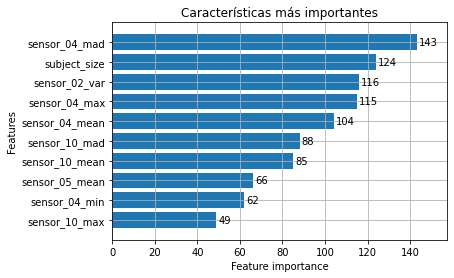

In [ ]:
ltb.plot_importance(model, max_num_features=10, height=0.8, title='Características más importantes')
plt.show()

Con eso concluye el primer modelo. Ahora se empezará con el segundo modelo una red neuronal profunda.

In [ ]:
# Llamamos las librerías
import tensorflow as tf 
import keras 
from keras import layers

Definimos el modelo

In [ ]:
model_2 = keras.Sequential([
    layers.Dense(256, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'selu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')])

In [ ]:
custom_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.005)

model_2.compile(optimizer = custom_optimizer, 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'auto',    
    min_delta = 0,
    patience = 15,
    verbose = 1, 
    restore_best_weights = True)

Entrenamos el modelo

In [ ]:
history = model_2.fit(X_train,
                    y_train,
                    epochs = 200,
                    batch_size = 30,
                    callbacks = [early_stopping],
                    validation_data = (X_val, y_val), 
                    verbose = 3)

Epoch 1/200
606/606 [==============================] - 3s 4ms/step - loss: 7.3392 - accuracy: 0.5072 - val_loss: 0.6933 - val_accuracy: 0.4944
Epoch 2/200
606/606 [==============================] - 2s 4ms/step - loss: 0.6933 - accuracy: 0.5007 - val_loss: 0.6935 - val_accuracy: 0.4944
Epoch 3/200
606/606 [==============================] - 2s 4ms/step - loss: 0.6933 - accuracy: 0.4951 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 4/200
606/606 [==============================] - 2s 4ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 5/200
606/606 [==============================] - 2s 3ms/step - loss: 0.6933 - accuracy: 0.4939 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 6/200
606/606 [==============================] - 2s 3ms/step - loss: 0.6933 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 7/200
606/606 [==============================] - 2s 3ms/step - loss: 0.6933 - accuracy: 0.4934 - val_loss: 0.6931 - val_accuracy: 0.5056

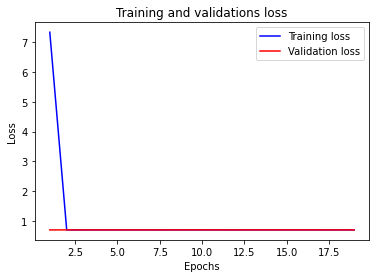

In [ ]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'r', label = 'Validation loss')
plt.title('Training and validations loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Finalmente, se unifican las probabilidades de ambos modelos en una regresión lineal como modelo final.

In [ ]:
from sklearn.linear_model import LogisticRegression

model_3 = LogisticRegression()
feat_1 = model.predict_proba(X_train)[:,1]
feat_2 = model_2.predict(X_train)
X_logit = np.concatenate((feat_1.reshape(feat_1.shape[0],1), 
                          feat_2.reshape(feat_2.shape[0],1)), axis = 1)

In [ ]:
model_3.fit(X_logit, y_train)

LogisticRegression()

Juntamos los modelos con una regresión lineal.

In [ ]:
def model_global(df):
  feat_1 = model.predict_proba(df)[:,1]
  feat_2 = model_2.predict(df)
  feat_3 = np.concatenate((feat_1.reshape(feat_1.shape[0],1), 
                          feat_2.reshape(feat_2.shape[0],1)), axis = 1)
  y_hat = model_3.predict(feat_3)
  
  return y_hat

Esta es la precisión del modelo global (la unión de ambos).

In [ ]:
y_hat = model_global(X_val)
score = roc_auc_score(y_val, y_hat)
print(score)

0.84788754756137


In [ ]:
ignore = ['sequence', 'state', 'subject']
X = [feat for feat in train_merge_data.columns if feat not in ignore]

X_test = test_merge_data[X]

Generamos las predicciones y descargamos el archivo.

In [ ]:
y_hat = model_global(X_test)
submission = pd.DataFrame({"sequence": test_merge_data['sequence'],"state": y_hat})
submission = submission.astype('int32')
submission.to_csv('my_submission.csv', index=False)

Evaluación del modelo

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score

In [ ]:
y_hat = model_global(X_val)
y = y_val

In [ ]:
jaccard = jaccard_score(y, y_hat)
f1 = f1_score(y, y_hat)
logloss = log_loss(y, y_hat)
precision = precision_score(y, y_hat)

In [ ]:
print('Jaccard score: %.2f' % jaccard)
print('F1 score: %.2f' % f1)
print('Log loss score: %.2f' % logloss)
print('Precision score: %.2f' % precision)

Jaccard score: 0.87
F1 score: 0.93
Log loss score: 2.42
Precision score: 0.92
